In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['axes.unicode_minus']=False # 显示负数
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [106]:
data = pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 数据预处理

In [107]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
m = data["Age"].drop(data.loc[data["Age"].isna(), :].index).astype('float').median()
data["Age"].fillna(m, inplace=True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [110]:
data.loc[data["Sex"] == "male", "Sex"] = 0
data.loc[data["Sex"] == "female", "Sex"] = 1
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [117]:
data.loc[data["Embarked"] == "S", "Embarked"] = 0
data.loc[data["Embarked"] == "C", "Embarked"] = 1
data.loc[data["Embarked"] == "Q", "Embarked"] = 2
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [118]:
data.dropna(subset=["Embarked"], inplace=True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [119]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


# 数据处理

In [120]:
x = data.loc[:, ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].values
y = data["Survived"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=23)

In [130]:
cls = RandomForestClassifier(max_depth=4, random_state=23)
cls.fit(x_train, y_train)
y_pre = cls.predict(x_test)

In [131]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       386
           1       0.80      0.67      0.73       237

    accuracy                           0.81       623
   macro avg       0.81      0.78      0.79       623
weighted avg       0.81      0.81      0.81       623



In [132]:
cls.score(x_test, y_test)

0.8105939004815409

In [133]:
cm = confusion_matrix(y_test, y_pre, labels=[1, 0])
cm

array([[158,  79],
       [ 39, 347]], dtype=int64)

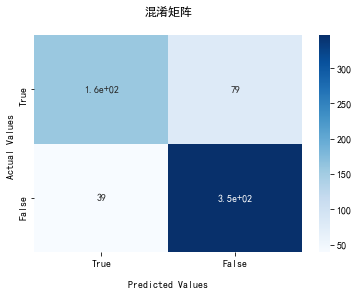

In [134]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')
ax.set_title('混淆矩阵\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["True", "False"])
ax.yaxis.set_ticklabels(["True", "False"])
plt.show()

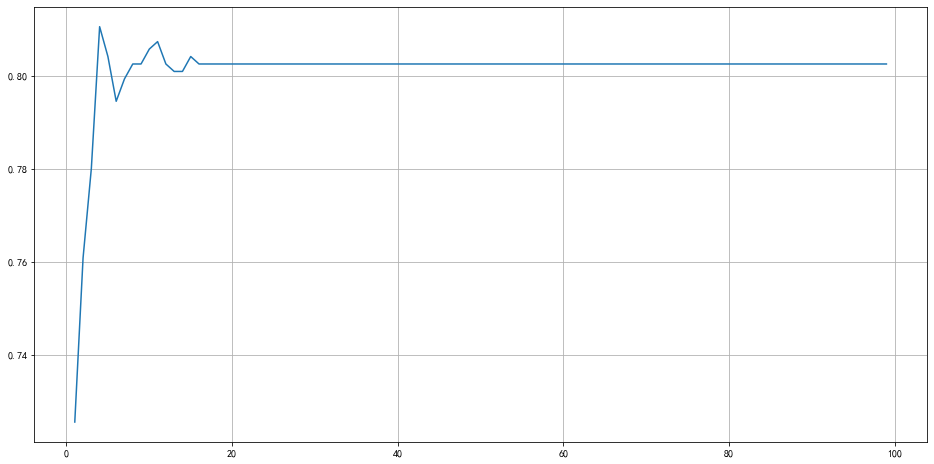

In [128]:
scores = []
for i in range(1, 100):
    cls = RandomForestClassifier(max_depth=i, random_state=23)
    cls.fit(x_train, y_train)
    scores.append(cls.score(x_test, y_test))

plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(range(1, 100), scores)
plt.show()

In [129]:
scores

[0.7255216693418941,
 0.7608346709470305,
 0.7800963081861958,
 0.8105939004815409,
 0.8041733547351525,
 0.7945425361155698,
 0.7993579454253612,
 0.8025682182985554,
 0.8025682182985554,
 0.8057784911717496,
 0.8073836276083467,
 0.8025682182985554,
 0.8009630818619583,
 0.8009630818619583,
 0.8041733547351525,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182985554,
 0.8025682182

使用K折交叉验证

In [69]:
kf = KFold(n_splits=5)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [140]:
i = 0
acc = []
cls = RandomForestClassifier(max_depth=4, random_state=23)
for train_index, test_index in kf.split(x):
    i += 1
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("这是第{}次训练".format(i))
    print('-'*60)
    cls.fit(x_train, y_train)
    y_pre = cls.predict(x_test)
    acc.append(cls.score(x_test, y_test))
    print("第{}次测试的评价指标:".format(i))
    print(classification_report(y_test, y_pre))
    print('-'*60)
    print()

这是第1次训练
------------------------------------------------------------
第1次测试的评价指标:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       120
           1       0.71      0.67      0.69        58

    accuracy                           0.80       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.80      0.80      0.80       178

------------------------------------------------------------

这是第2次训练
------------------------------------------------------------
第2次测试的评价指标:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        99
           1       0.90      0.70      0.79        79

    accuracy                           0.83       178
   macro avg       0.85      0.82      0.82       178
weighted avg       0.84      0.83      0.83       178

------------------------------------------------------------

这是第3次训练
----------------------------------------------------

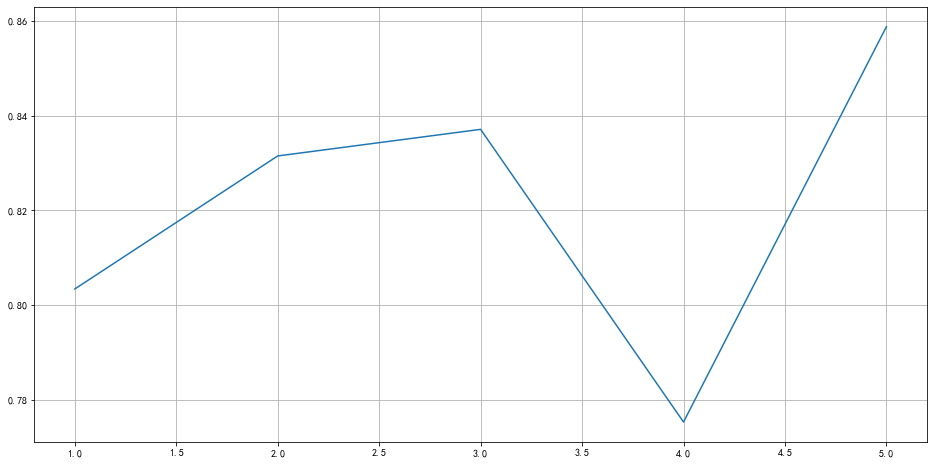

In [141]:
plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(range(1, 6), acc)
plt.show()

In [139]:
print("K折交叉验证后模型的准确率为{}".format(np.mean(acc)))

K折交叉验证后模型的准确率为0.8211896146765694
